**1. Import Core Libraries**



In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


**2. Load the Dataset**





In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**3. Data Cleaning**

In [4]:
# Drop unnecessary columns
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

# Check info
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


**4. Exploratory Data Analysis (EDA)**

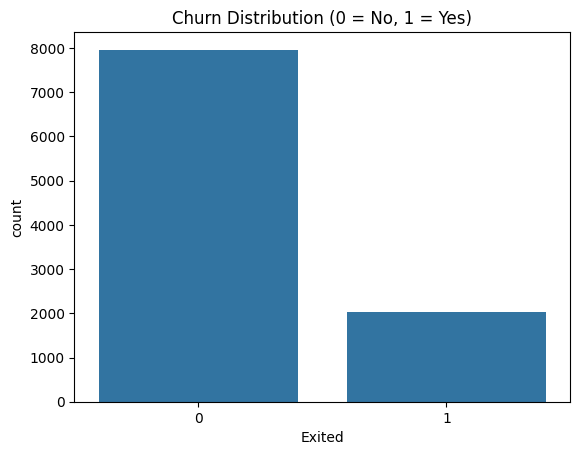

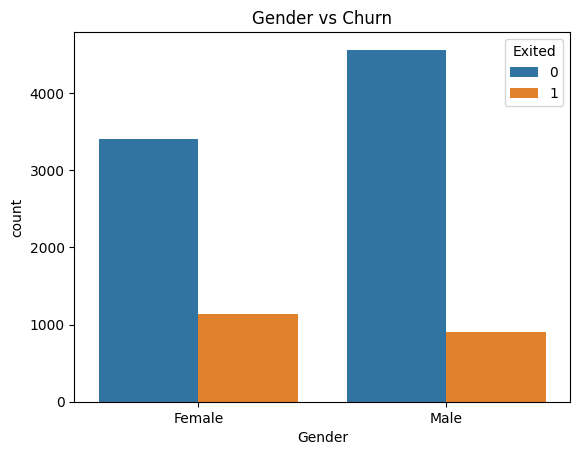

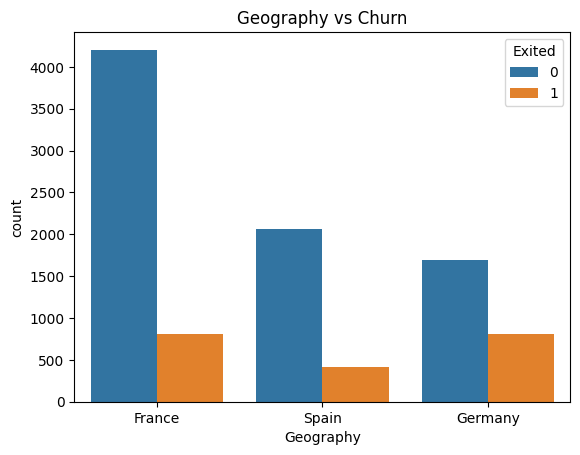

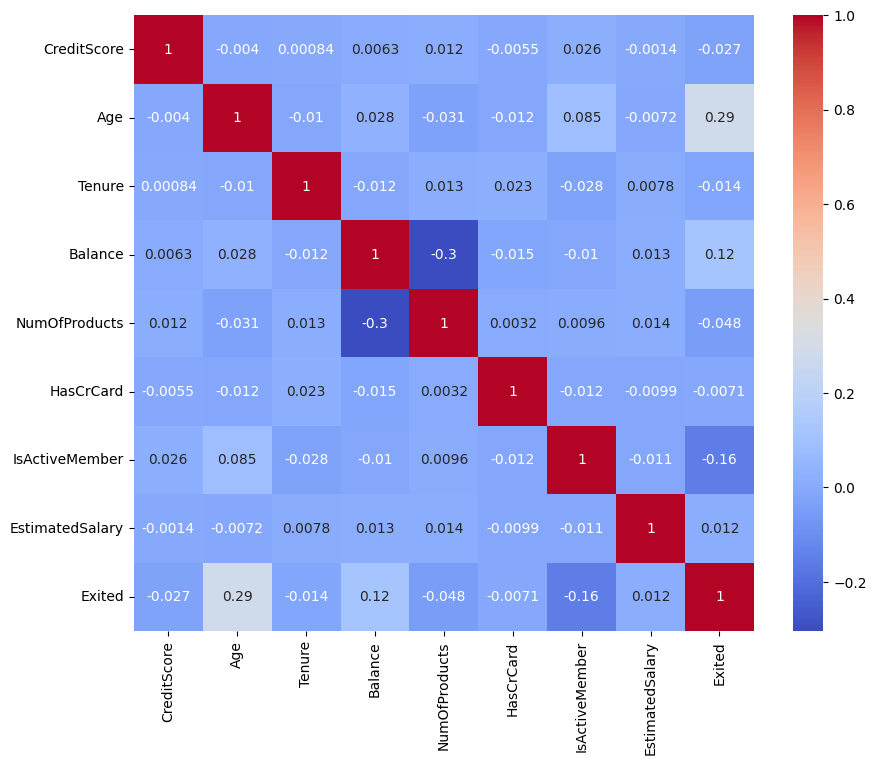

In [6]:
# Distribution of churn
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()

# Gender vs Churn
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Gender vs Churn')
plt.show()

# Geography vs Churn
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Geography vs Churn')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
# Drop non-numeric columns before calculating correlation
sns.heatmap(df.drop(['Geography', 'Gender'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

**5. Data Preprocessing**

Encode categorical features:

In [7]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

Split features & target:

In [8]:
X = df.drop('Exited', axis=1)
y = df['Exited']

Train-test split:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scale numerical features:

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**6. Model Building and Evaluation**

Logistic Regression

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

AUC: 0.5805960247074267


Random Forest Classifier

In [12]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

AUC: 0.7223842571700465


**7. Feature Importance**

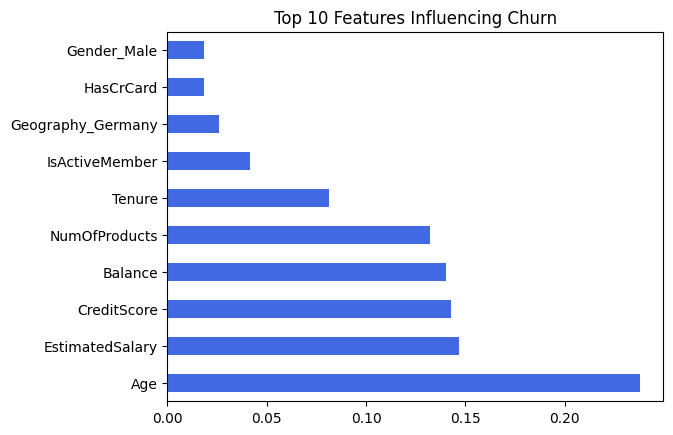

In [13]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)
top10.plot(kind='barh', color='royalblue')
plt.title("Top 10 Features Influencing Churn")
plt.show()

**8. Evaluate Confusion Matrix**

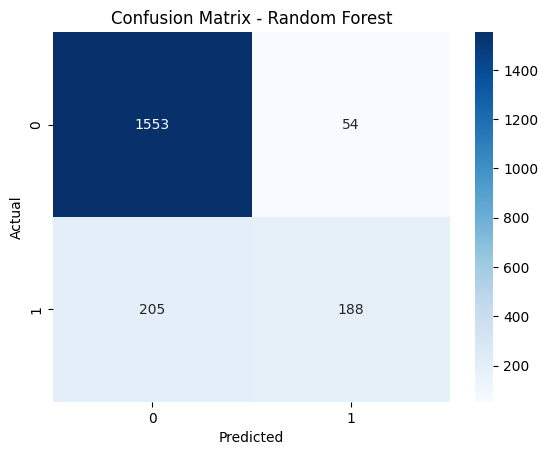

In [14]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

**9. Predict Churn for a New Customer**

In [16]:
sample = [[619, 42, 2, 0.00, 1, 1, 1, 101348.88, 0, 1, 0]]
# [CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography_Germany, Geography_Spain, Gender_Male]

pred = rf.predict(sample)
print("Customer will churn" if pred==1 else "Customer will stay")

Customer will stay


**10. Export Results for Power BI**

In [17]:
df['Predicted_Churn'] = rf.predict(X)
df.to_csv('bank_churn_results.csv', index=False)
from google.colab import files
files.download('bank_churn_results.csv')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>